# The Core AI/ML Problem Structure
This section outlines the fundamental workflow for tackling a machine learning problem.

**Key Points:**

1.  **Identify the Problem** : The first step is to clearly define the goal, which could be anything from image classification and price prediction to fraud detection.
2.  **Acquire Data** : Machine learning models learn from data. This step, which involves gathering, cleaning, and transforming data, is often the most time-consuming part of the process.
3.  **Create a Hypothesis Function** : This function, also called a model, is a mathematical representation that is assumed to explain the data. For instance, a model might take a fish's length measurements as input to predict its weight.
4.  **Find Numerical Values of Weights** : The model contains unknown parameters called "weights". The goal of training is to use the data to find the optimal numerical values for these weights.
5.  **Create an Error Function** : An error (or loss) function measures the difference between the model's predictions and the actual true values (ground truth).
6.  **Find a Way to Search for Minimizers** : The core of training is an optimization problem: finding the weights that minimize the error function. A common method for this is gradient descent, which uses the derivative of the error function to find the minimum.
7.  **Regularize a Function** : If a model fits the training data too perfectly, it may capture noise and perform poorly on new, unseen data. Regularization is a technique used to create smoother, more generalizable functions to prevent this issue, known as overfitting.

# Linear Regression
Linear regression is a fundamental model used to predict a numerical value by assuming a linear relationship between the input features and the output.

### 1. The Training Function:
The model assumes the output $y$ is a linear combination of the input features $x_i$ plus a bias term $\omega_0$.

**Formula:**
$y = \omega_0 + \omega_1x_1 + \omega_2x_2 + \dots + \omega_nx_n$

In vector notation, where $X$ is the matrix of features (with an added column of ones for the bias) and $\vec{\omega}$ is the vector of weights:
$$\vec{y}_{predict} = X\vec{\omega}$$

### 2. The Loss Function (Mean Squared Error):
The most common loss function for linear regression is the Mean Squared Error (MSE), which calculates the average of the squared differences between the predicted and true values.

**Formula:**
$$MSE = \frac{1}{m} \sum_{i=1}^{m} (y_{predict_i} - y_{true_i})^2$$

Using vector notation:
$$MSE = \frac{1}{m} ||X\vec{\omega} - \vec{y}_{true}||_2^2$$
where $m$ is the number of data points.

*Image Example: A plot showing the difference between squared distance and absolute distance. The squared distance penalizes larger errors more heavily.*

### 3. Optimization (Finding the Best Weights):
For linear regression, we can find the optimal weights analytically by taking the derivative of the MSE loss function with respect to the weights, setting it to zero, and solving for $\vec{\omega}$. This gives us the **Normal Equation**.

**Formula (The Normal Equation):**
$$\vec{\omega} = (X^T X)^{-1} X^T \vec{y}_{true}$$

*Note: While this formula provides a direct solution, it can be computationally expensive to calculate the inverse of $X^T X$ for large datasets. In practice, numerical optimization methods like gradient descent are often used.*

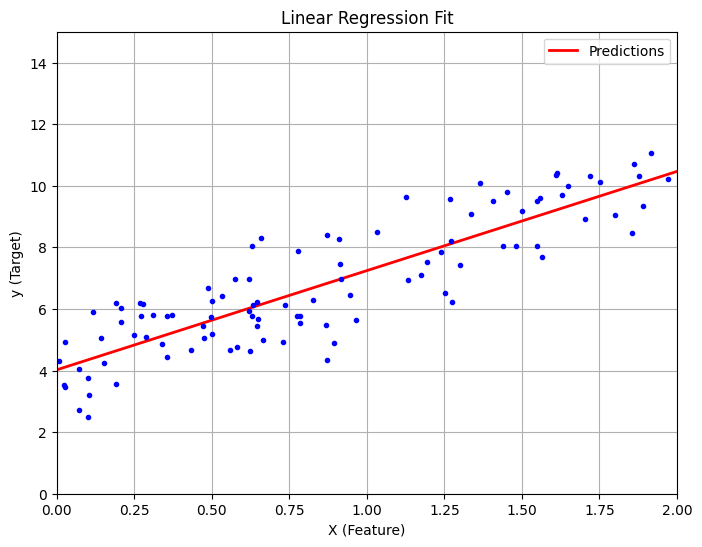

Intercept (omega_0): 4.0247314444421045
Coefficient (omega_1): 3.2195257141569926


In [ ]:
# Python Example for Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Acquire Data
# Generate some synthetic data with a linear relationship
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + noise

# 2. Create and train the model (Hypothesis function + find weights)
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 3. Make predictions
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# 4. Visualize the results
plt.figure(figsize=(8, 6))
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X (Feature)")
plt.ylabel("y (Target)")
plt.title("Linear Regression Fit")
plt.legend()
plt.axis([0, 2, 0, 15])
plt.grid(True)
plt.show()

# The model found the intercept (omega_0) and coefficient (omega_1)
print(f"Intercept (omega_0): {lin_reg.intercept_[0]}")
print(f"Coefficient (omega_1): {lin_reg.coef_[0][0]}")

# Slide 3: Logistic Regression (Binary Classification)
Logistic regression is used for binary classification tasks, where the goal is to predict one of two possible outcomes (e.g., yes/no, true/false).

### 1. The Training Function:
The model first calculates a linear combination of the features and a bias term, similar to linear regression. However, this result is then passed through the **logistic function** (also known as the **sigmoid function**), which squashes the output to a value between 0 and 1. This output can be interpreted as a probability.

**Formula (Logistic/Sigmoid Function):**
$$\sigma(s) = \frac{1}{1 + e^{-s}}$$
where $s = \omega_0 + \omega_1x_1 + \dots + \omega_nx_n$.

The final prediction is then made based on a threshold (typically 0.5):
$$\hat{y} = \begin{cases} 1 & \text{if } \sigma(s) \ge 0.5 \\ 0 & \text{if } \sigma(s) < 0.5 \end{cases}$$

*Image Example: A plot of the logistic (sigmoid) function.*

### 2. The Loss Function (Cross-Entropy):
Since the output of logistic regression is a probability, the Mean Squared Error is not the ideal loss function. Instead, we use the **Cross-Entropy Loss** (or Log Loss), which penalizes confident but incorrect predictions more heavily.

The cost for a single training example is:
$$cost(\hat{y}, y_{true}) = \begin{cases} -\log(\hat{y}) & \text{if } y_{true} = 1 \\ -\log(1 - \hat{y}) & \text{if } y_{true} = 0 \end{cases}$$

This can be written in a single equation:
$$-[y_{true}\log(\hat{y}) + (1 - y_{true})\log(1 - \hat{y})]$$

The total loss is the average of this cost over all training examples.

**Formula (Cross-Entropy Loss):**
$$L(\vec{\omega}) = -\frac{1}{m} \sum_{i=1}^{m} [y_{true_i}\log(\sigma(s_i)) + (1 - y_{true_i})\log(1 - \sigma(s_i))]$$

In [ ]:
# Python Example for Logistic Regression
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Acquire Data
# Generate synthetic data for a binary classification problem
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Create and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 3. Make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

# Show the first 5 predictions and their probabilities
print("\nSample Predictions:")
print("Features (first 5 test samples):\n", X_test[:5])
print("Predicted Class:", y_pred[:5])
print("Probabilities [P(class 0), P(class 1)]:\n", np.round(y_pred_proba[:5], 3))

Logistic Regression Accuracy: 0.8750

Sample Predictions:
Features (first 5 test samples):
 [[-0.62154585  2.99462288]
 [ 0.46785542  0.7871928 ]
 [ 0.30162791  0.22791173]
 [ 0.17677464  0.36618904]
 [ 1.0951577   1.64017517]]
Predicted Class: [0 1 1 1 1]
Probabilities [P(class 0), P(class 1)]:
 [[0.902 0.098]
 [0.302 0.698]
 [0.299 0.701]
 [0.362 0.638]
 [0.19  0.81 ]]


# Softmax Regression (Multi-class Classification)
Softmax regression, also known as multinomial logistic regression, is a generalization of logistic regression that allows for classification into multiple classes.

### 1. The Training Function:
For each class $j$, the model calculates a score $s_j$. These scores are then passed through the **softmax function**, which converts them into probabilities.

**Formula (Softmax Function):**
$$\sigma(\vec{s})_j = \frac{e^{s_j}}{\sum_{k=1}^{K} e^{s_k}}$$
where $\vec{s}$ is the vector of scores for each of the $K$ classes. Each score is calculated as a linear combination of features:
$$s_j = \vec{\omega}_j^T \vec{x} + b_j$$

The class with the highest probability is chosen as the prediction.

### 2. The Loss Function (Generalized Cross-Entropy):
The loss function for softmax regression is a generalization of the cross-entropy loss for multiple classes.

**Formula (Generalized Cross-Entropy Loss):**
$$L = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_{true,k_i} \log(\sigma(\vec{s}_{k_i}))$$
where $y_{true,k_i}$ is 1 if the true class for the i-th example is k, and 0 otherwise.

In [ ]:
# Python Example for Softmax Regression
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Acquire Data
# The Iris dataset is a classic multi-class classification problem
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create and train the model
# By setting multi_class='multinomial', LogisticRegression uses the Softmax function.
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
softmax_reg.fit(X_train, y_train)

# 3. Make predictions
y_pred = softmax_reg.predict(X_test)

# 4. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Softmax Regression Accuracy on Iris dataset: {accuracy:.4f}")

# Example: Predict the class for a new flower
new_flower = [[5.1, 3.5, 1.4, 0.2]] # An example of Iris-setosa
predicted_class = softmax_reg.predict(new_flower)
predicted_proba = softmax_reg.predict_proba(new_flower)

print(f"\nPrediction for features {new_flower[0]}:")
print(f"Predicted class: {iris.target_names[predicted_class][0]} (class {predicted_class[0]})")
print(f"Probabilities: {np.round(predicted_proba, 4)}")

Softmax Regression Accuracy on Iris dataset: 1.0000

Prediction for features [5.1, 3.5, 1.4, 0.2]:
Predicted class: setosa (class 0)
Probabilities: [[0.9766 0.0234 0.    ]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Support Vector Machines (SVM)
Support Vector Machines (SVMs) are powerful models that can be used for both classification and regression. For classification, the key idea is to find a hyperplane that best separates the data into different classes.

### 1. The Model (Maximal Margin Classifier):
An SVM seeks to find a decision boundary that **maximizes the margin**, which is the distance between the decision boundary and the closest data points from either class. These closest points are called **support vectors**. This approach makes the classifier more robust to new data.

*Image Example: An illustration of the maximal margin. The solid line is the decision boundary, and the dashed lines represent the edges of the margin, which are determined by the support vectors.*

### 2. The Loss Function (Hinge Loss):
The loss function for SVMs is designed to encourage a large margin. It consists of two parts: the hinge loss and a regularization term.

**Formula (Hinge Loss for a single prediction):**
$$L_{hinge} = \max(0, 1 - y_{true} \cdot (\vec{w}^T \vec{x} - b))$$
The hinge loss is zero for points that are correctly classified and outside the margin. For other points, the loss increases as they get closer to the decision boundary or are misclassified.

**Formula (Full SVM Loss Function):**
$$L(\vec{w}) = \lambda ||\vec{w}||^2 + \frac{1}{m} \sum_{i=1}^{m} \max(0, 1 - y_{true_i} \cdot (\vec{w}^T \vec{x}_i - b))$$
The first term is the regularization term, which pushes the model to have a larger margin by keeping the weights $\vec{w}$ small. The hyperparameter $\lambda$ controls the trade-off between maximizing the margin and minimizing the classification error.

### 3. The Kernel Trick:
For data that is not linearly separable, SVMs can use the **kernel trick**. This involves mapping the data to a higher-dimensional space where it becomes linearly separable, without explicitly performing the transformation. This is done using a kernel function.

**Common Kernel Functions:**
* **Polynomial Kernel:** $K(\vec{a}, \vec{b}) = (\vec{a}^T \vec{b} + c)^d$
* **Gaussian (RBF) Kernel:** $K(\vec{a}, \vec{b}) = \exp(-\gamma ||\vec{a} - \vec{b}||^2)$

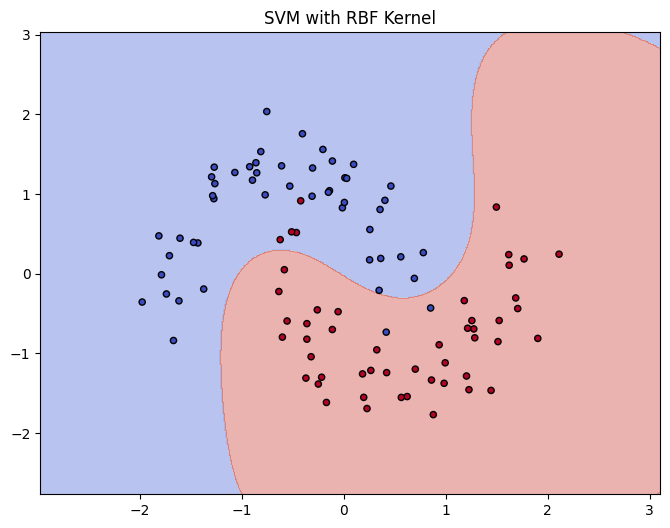

In [ ]:
# Python Example for SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 1. Acquire Data (non-linearly separable)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Scale the data for better SVM performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Create and train the SVM model (using the RBF kernel)
svm_clf = SVC(kernel="rbf", gamma='auto', C=1.0)
svm_clf.fit(X_scaled, y)

# 3. Visualize the decision boundary
def plot_decision_boundary(clf, X, y):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title("SVM with RBF Kernel")

plt.figure(figsize=(8, 6))
plot_decision_boundary(svm_clf, X_scaled, y)
plt.show()

# Decision Trees
Decision trees are versatile models that can be used for both classification and regression. They are easy to interpret and visualize.

### 1. The Model:
A decision tree is a tree-like structure where each internal node represents a test on a feature (e.g., "is Petal Width < 0.8?"), each branch represents the outcome of the test, and each leaf node represents a class label.

**Key Characteristics:**
* **Non-parametric:** Decision trees do not make strong assumptions about the form of the mapping function, giving them the flexibility to adapt to the data.
* **Feature Importance:** They naturally rank features by their importance in making predictions. Features that appear higher up in the tree are generally more important.
* **Risk of Overfitting:** A single decision tree can easily overfit the training data, capturing noise instead of the underlying patterns.

### 2. Training a Decision Tree:
The process of building a decision tree involves recursively splitting the data based on the feature that provides the "best" split. Two common criteria for measuring the quality of a split are **Gini Impurity** and **Entropy**.

* **Gini Impurity:** Measures the frequency with which any element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
**Formula:*
$$Gini = 1 - \sum_{k=1}^{K} (p_k)^2$$
    where $p_k$ is the fraction of instances of class k in the node. A Gini impurity of 0 means the node is "pure" (all instances belong to the same class).

* **Entropy and Information Gain:** Entropy is a measure of disorder or uncertainty. The goal is to choose the split that results in the largest Information Gain, which is the reduction in entropy.
    **Entropy Formula:**
    $$H = - \sum_{k=1}^{K} p_k \log_2(p_k)$$
    **Information Gain Formula:**
    $$IG(D, A) = H(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} H(D_v)$$
    where $D$ is the dataset, $A$ is an attribute, and $D_v$ is the subset of D where attribute A has value v.

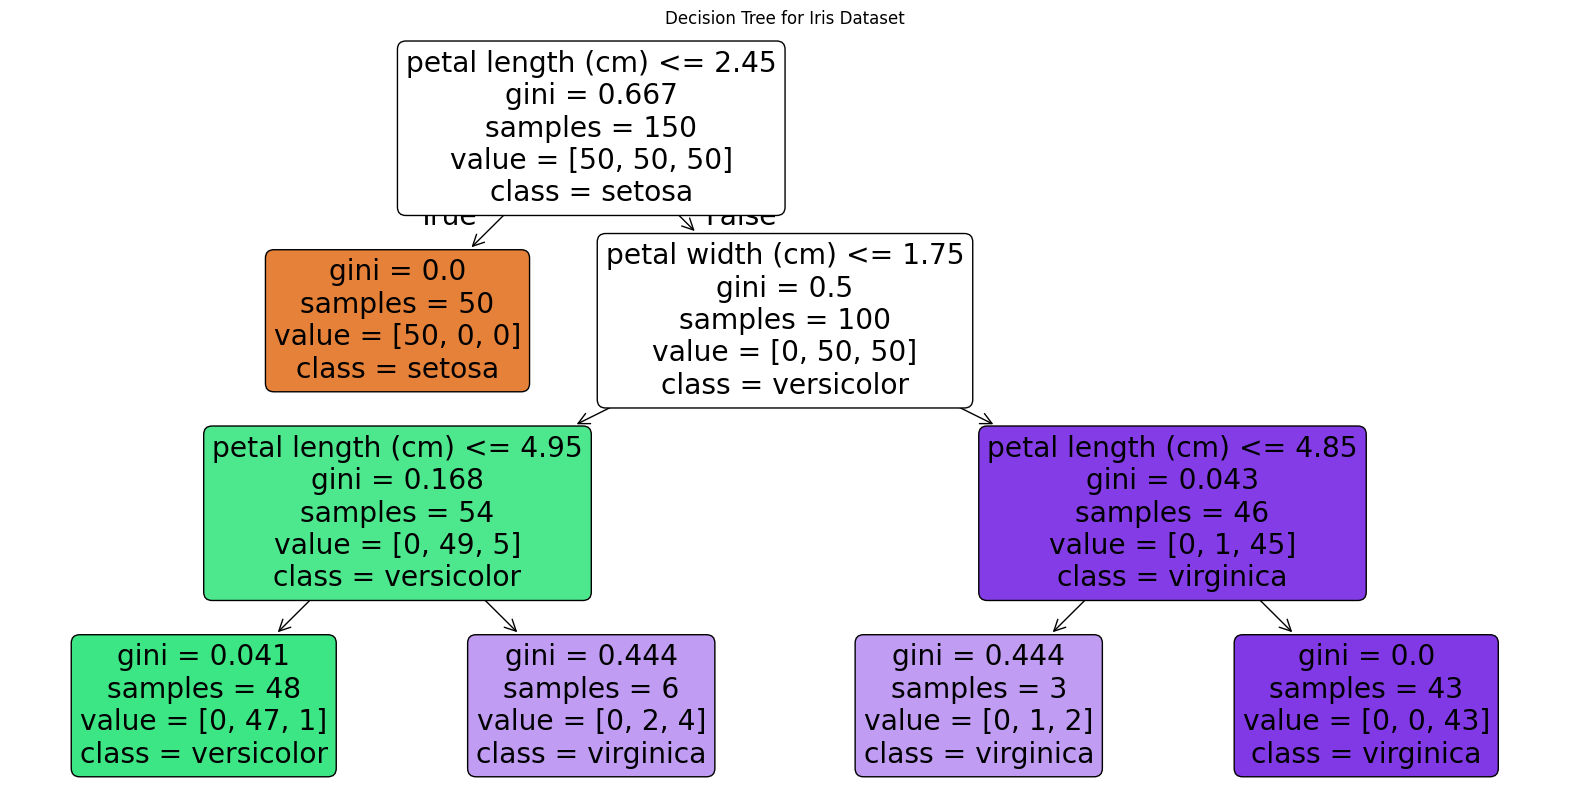

In [ ]:
# Python Example for Decision Trees
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Acquire Data
iris = load_iris()
X = iris.data
y = iris.target

# 2. Create and train the model
# max_depth is a regularization parameter to prevent overfitting
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# 3. Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree for Iris Dataset")
plt.show()

# Random Forests
A random forest is an ensemble method that addresses the shortcomings of individual decision trees, particularly their tendency to overfit.

### How it Works:
A random forest builds multiple decision trees on different random subsets of the training data and features. For a new prediction, each tree in the forest gives a classification, and the forest chooses the class with the most "votes".

**Advantages:**
* **Reduced Overfitting:** By averaging the results of many trees, random forests are less prone to overfitting.
* **Higher Accuracy:** They generally achieve higher accuracy than single decision trees.
* **Robustness:** They are less sensitive to the specific training data and the presence of noisy features.

In [ ]:
# Python Example for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Acquire Data
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Create and train the model
# n_estimators is the number of trees in the forest
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

# 3. Make predictions and evaluate
y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Feature Importance
print("\nFeature Importances:")
for name, score in zip(iris.feature_names, rnd_clf.feature_importances_):
    print(f"{name}: {score:.4f}")

Random Forest Accuracy: 1.0000

Feature Importances:
sepal length (cm): 0.1081
sepal width (cm): 0.0304
petal length (cm): 0.4400
petal width (cm): 0.4215


# k-means Clustering
k-means clustering is an unsupervised learning algorithm used to partition data into k distinct, non-overlapping clusters.

### 1. The Algorithm:
The goal of k-means is to minimize the variance within each cluster. It does this through an iterative process:

1.  **Initialization:** Randomly select k data points as the initial cluster centroids.
2.  **Assignment Step:** Assign each data point to the cluster of its nearest centroid (usually based on Euclidean distance).
3.  **Update Step:** Recalculate the centroid of each cluster by taking the mean of all data points assigned to it.

Steps 2 and 3 are repeated until the cluster assignments no longer change.

*Image Example: An illustration of the k-means clustering process, showing the initial random centroids, the assignment of points to clusters, and the updated centroids.*

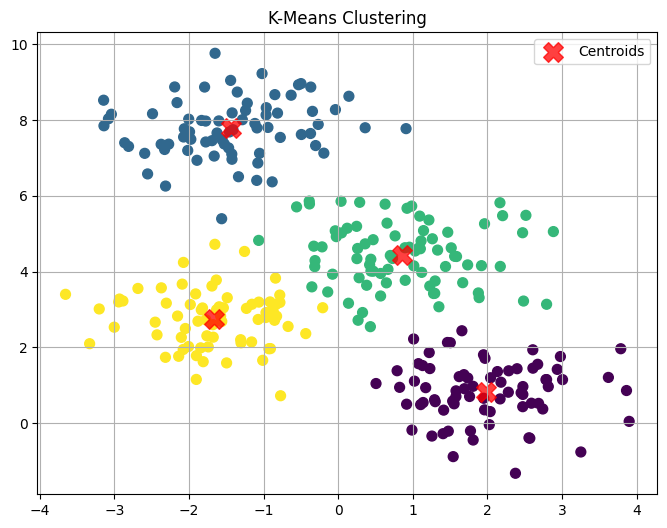

In [ ]:
# Python Example for k-means Clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Acquire Data
# Generate data with distinct clusters (unsupervised, so we don't use 'y')
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# 2. Create and fit the model
# n_init='auto' suppresses a future warning
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize the results
plt.figure(figsize=(8, 6))
# Plot the data points, colored by their assigned cluster
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot the final cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()

# Performance Metrics for Classification
To evaluate how well a classification model is performing, we use various performance metrics. Simply looking at accuracy can be misleading, especially for imbalanced datasets.

### 1. The Confusion Matrix:
A confusion matrix is a table that summarizes the performance of a classification model.

|                | **Predicted Negative** | **Predicted Positive** |
| :------------- | :------------------- | :------------------- |
| **Actual Negative** | True Negatives (TN)  | False Positives (FP) |
| **Actual Positive** | False Negatives (FN) | True Positives (TP)  |


### 2. Key Performance Metrics:
* **Accuracy:** The percentage of correct predictions.

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

* **Precision:** The accuracy of the positive predictions. It answers the question: "Of all the predictions for the positive class, how many were correct?"
    $$\text{Precision} = \frac{TP}{TP + FP}$$

* **Recall (Sensitivity):** The ratio of positive instances that are correctly classified. It answers the question: "Of all the actual positive instances, how many did we correctly identify?"
    $$\text{Recall} = \frac{TP}{TP + FN}$$

* **F1-Score:** The harmonic mean of precision and recall. It provides a single score that balances both metrics.
    $$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

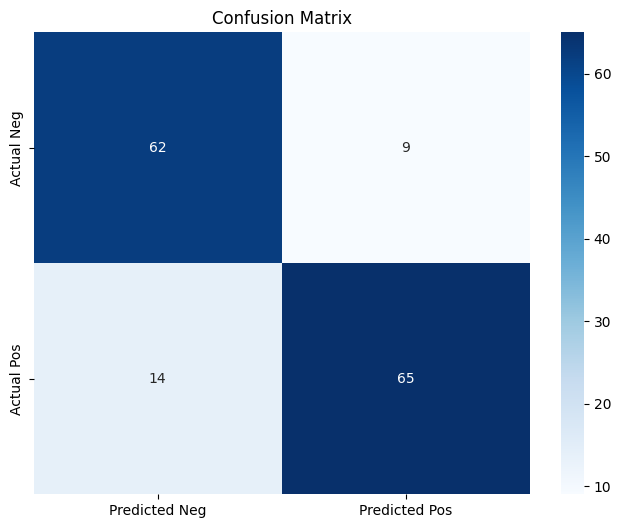

Accuracy: 0.8467
Precision: 0.8784
Recall: 0.8228
F1-Score: 0.8497

--- Classification Report ---
              precision    recall  f1-score   support

     Class 0       0.82      0.87      0.84        71
     Class 1       0.88      0.82      0.85        79

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [ ]:
# Python Example for calculating Performance Metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# 1. Get data and predictions (using a logistic regression model as an example)
X, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 2. Calculate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Neg', 'Predicted Pos'], yticklabels=['Actual Neg', 'Actual Pos'])
plt.title('Confusion Matrix')
plt.show()


# 3. Calculate and print individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 4. Use the classification_report for a comprehensive summary
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))